# Project 2 - Data Science Workflow

This is the submission of: Chuandong Liu, Woolim Lee

"We worked on this assignment alone.”

In [460]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"     # to keep all output without use of print()

## PART 2: GET THE DATA

In [461]:
# Task 2a

df = pd.read_csv("Telco-Customer-Churn.csv")

In [462]:
# Task 2b

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
3,1452-KIOVK,Male,0.0,No,Yes,22.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
4,6713-OKOMC,Female,0.0,No,No,10.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


In [463]:
# Task 2c

df.shape #this returns the shape of the dataframe

df.info() #this lists the fields with their datatypes

(7046, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7046 non-null   object 
 1   gender            7045 non-null   object 
 2   SeniorCitizen     7045 non-null   float64
 3   Partner           7046 non-null   object 
 4   Dependents        7045 non-null   object 
 5   tenure            7045 non-null   float64
 6   PhoneService      7044 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7039 non-null   object 
 9   OnlineSecurity    7041 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7041 non-null   object 
 12  TechSupport       7037 non-null   object 
 13  StreamingTV       7040 non-null   object 
 14  StreamingMovies   7039 non-null   object 
 15  Contract          7036 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## PART 3: DATA CLEANING 

In [464]:
# Task 3a

df.isnull().sum()

customerID           0
gender               1
SeniorCitizen        1
Partner              0
Dependents           1
tenure               1
PhoneService         2
MultipleLines        3
InternetService      7
OnlineSecurity       5
OnlineBackup         3
DeviceProtection     5
TechSupport          9
StreamingTV          6
StreamingMovies      7
Contract            10
PaperlessBilling     3
PaymentMethod        3
MonthlyCharges       5
TotalCharges         3
Churn               11
dtype: int64

In [465]:
# Task 3b

df['Churn'].replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [466]:
# Task 3c
churnIsNull = df.loc[:,['customerID','Churn']][df['Churn'].isnull() == True]
churnIsNull

,customerID,Churn
251,6035-BXTTY,NaN
261,5160-UXJED,NaN
267,5229-DTFYB,NaN
302,7606-BPHHN,NaN
316,8111-BKVDS,NaN
341,5229-DTFYB,NaN
866,7129-ACFOG,NaN
1001,5624-RYAMH,NaN
1002,0196-JTUQI,NaN
1003,7130-YXBRO,NaN


In [467]:
# Task 3d

df.value_counts('Churn') #number of No and Yes for Churn status

df.loc[df['Churn'].isnull() == True, 'Churn'] = 'No' 

df.value_counts('Churn')

df.to_csv('filename.csv',index=False)

Churn
No     5167
Yes    1868
dtype: int64

Churn
No     5178
Yes    1868
dtype: int64

In [468]:
# Task 3e: Display any rows with more than one missing value. 

df[list(df.columns)][df.isnull().sum(1)>1]

df.loc[df.isnull().sum(1)>1]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
103,7850-VWJUU,Female,0.0,No,No,23.0,Yes,No,NaN,NaN,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.00,1778.5,No
116,9073-ZZIAY,Male,0.0,Yes,Yes,62.0,Yes,NaN,NaN,NaN,...,NaN,NaN,Yes,Yes,Two year,No,Electronic check,86.10,5215.25,No
117,3077-RSNTJ,Female,0.0,Yes,Yes,6.0,Yes,NaN,NaN,NaN,...,NaN,NaN,No internet service,No internet service,Month-to-month,No,Mailed check,19.70,113.5,No
157,6348-SNFUS,Male,0.0,Yes,Yes,72.0,No,No phone service,DSL,NaN,...,Yes,Yes,No,Yes,Two year,Yes,Credit card (automatic),55.45,4179.2,No
190,4075-JFPGR,Female,0.0,Yes,No,51.0,Yes,No,Fiber optic,Yes,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4619.55,No
191,3282-ZISZV,Male,0.0,No,Yes,32.0,Yes,Yes,DSL,No,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2633.3,No
197,7529-ZDFXI,Male,1.0,Yes,No,57.0,NaN,Yes,NaN,NaN,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,89.85,4925.35,No
282,5686-CMAWK,NaN,NaN,No,No,17.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,NaN,NaN,NaN,86.75,1410.25,No
290,9774-NRNAU,Male,1.0,Yes,No,27.0,Yes,Yes,DSL,No,...,Yes,NaN,NaN,NaN,Month-to-month,Yes,Bank transfer (automatic),84.80,2309.55,No
320,4360-PNRQB,Male,0.0,No,NaN,NaN,NaN,NaN,NaN,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.60,1395.05,No


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
103,7850-VWJUU,Female,0.0,No,No,23.0,Yes,No,NaN,NaN,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.00,1778.5,No
116,9073-ZZIAY,Male,0.0,Yes,Yes,62.0,Yes,NaN,NaN,NaN,...,NaN,NaN,Yes,Yes,Two year,No,Electronic check,86.10,5215.25,No
117,3077-RSNTJ,Female,0.0,Yes,Yes,6.0,Yes,NaN,NaN,NaN,...,NaN,NaN,No internet service,No internet service,Month-to-month,No,Mailed check,19.70,113.5,No
157,6348-SNFUS,Male,0.0,Yes,Yes,72.0,No,No phone service,DSL,NaN,...,Yes,Yes,No,Yes,Two year,Yes,Credit card (automatic),55.45,4179.2,No
190,4075-JFPGR,Female,0.0,Yes,No,51.0,Yes,No,Fiber optic,Yes,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4619.55,No
191,3282-ZISZV,Male,0.0,No,Yes,32.0,Yes,Yes,DSL,No,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2633.3,No
197,7529-ZDFXI,Male,1.0,Yes,No,57.0,NaN,Yes,NaN,NaN,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,89.85,4925.35,No
282,5686-CMAWK,NaN,NaN,No,No,17.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,NaN,NaN,NaN,86.75,1410.25,No
290,9774-NRNAU,Male,1.0,Yes,No,27.0,Yes,Yes,DSL,No,...,Yes,NaN,NaN,NaN,Month-to-month,Yes,Bank transfer (automatic),84.80,2309.55,No
320,4360-PNRQB,Male,0.0,No,NaN,NaN,NaN,NaN,NaN,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.60,1395.05,No


In [469]:
# Task 3f:  remove from the DataFrame any rows with more than one missing value
df.shape
df.drop(df.loc[df.isnull().sum(1)>1].index, inplace = True)
df.shape


(7046, 21)

(7029, 21)

In [470]:
# Task 3g:  Eliminate any duplicate records. Update the shape statistic

df = df.drop_duplicates()
df.shape

(7018, 21)

In [471]:
# Task 3h: Replace all occurrences of ‘No internet service’ with NaN.

df.replace('No internet service', np.nan, inplace=True) 


In [472]:
# Task 3i

df.replace(['Bank transfer (automatic)', 'Credit card (automatic)'],'Automatic',inplace=True) 


In [473]:
# Task 3j

df.set_index('customerID', inplace=True)


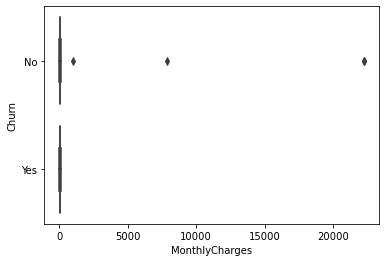

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7764-BDPEE,Male,0.0,No,Yes,3.0,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,No,Mailed check,22220.85,60.65,No
2812-REYAT,Female,0.0,Yes,No,49.0,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,One year,Yes,Automatic,22220.05,923.1,No
8039-ACLPL,Female,0.0,Yes,Yes,72.0,Yes,No,DSL,Yes,Yes,Yes,No,No,Yes,Two year,No,Automatic,7868.75,4888.2,No
9450-TRJUU,Male,0.0,No,No,35.0,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,983.15,2848.45,No
7569-NMZYQ,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Automatic,118.75,8672.45,No
8984-HPEMB,Female,0.0,No,No,71.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.6,No
5989-AXPUC,Female,0.0,Yes,No,68.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No
5734-EJKXG,Female,0.0,No,No,61.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.7,No
8199-ZLLSA,Male,0.0,No,No,67.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Automatic,118.35,7804.15,Yes


In [474]:
# Task 3k
ax = sns.boxplot(x=df['MonthlyCharges'],y=df['Churn'])
plt.show()
df.nlargest(10,'MonthlyCharges',keep='first')


In [475]:
# Task 3l

df.loc[df['MonthlyCharges'] > 118.75, 'MonthlyCharges'] = 118.75 
df.nlargest(15,'MonthlyCharges',keep='first') 


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
9450-TRJUU,Male,0.0,No,No,35.0,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,118.75,2848.45,No
7764-BDPEE,Male,0.0,No,Yes,3.0,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,No,Mailed check,118.75,60.65,No
8039-ACLPL,Female,0.0,Yes,Yes,72.0,Yes,No,DSL,Yes,Yes,Yes,No,No,Yes,Two year,No,Automatic,118.75,4888.2,No
2812-REYAT,Female,0.0,Yes,No,49.0,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,One year,Yes,Automatic,118.75,923.1,No
7569-NMZYQ,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Automatic,118.75,8672.45,No
8984-HPEMB,Female,0.0,No,No,71.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.6,No
5989-AXPUC,Female,0.0,Yes,No,68.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No
5734-EJKXG,Female,0.0,No,No,61.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.7,No
8199-ZLLSA,Male,0.0,No,No,67.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Automatic,118.35,7804.15,Yes


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

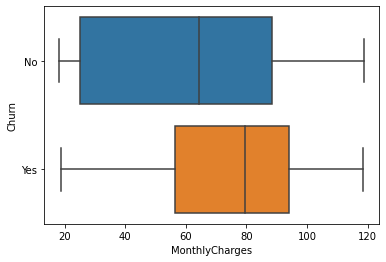

In [476]:
# Task 3m

sns.boxplot(x=df['MonthlyCharges'],y=df['Churn'])


In [477]:
# Task 3n
df.shape
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.drop(df.loc[df['MonthlyCharges'] * df['tenure'] > df['TotalCharges'] * 1.15].index, inplace = True)
df.drop(df.loc[df['MonthlyCharges'] * df['tenure'] < df['TotalCharges'] * 0.85].index, inplace = True)
df.shape

(7018, 20)

(6846, 20)

## PART 4: DATA EXPLORATION 

<AxesSubplot:xlabel='Churn', ylabel='count'>

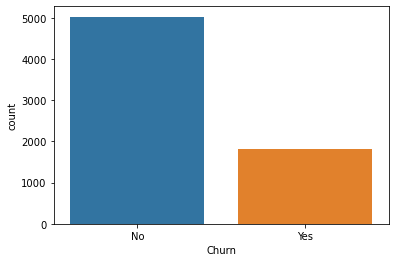

In [478]:
# Task 4a

sns.countplot(data = df, x='Churn')

<AxesSubplot:xlabel='InternetService', ylabel='MonthlyCharges'>

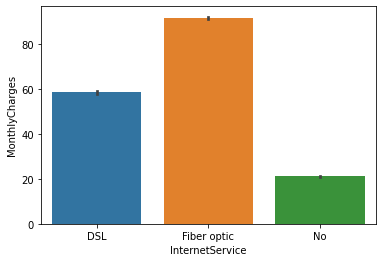

In [479]:
# Task 4b
sns.barplot(data = df,x ='InternetService',y = 'MonthlyCharges')


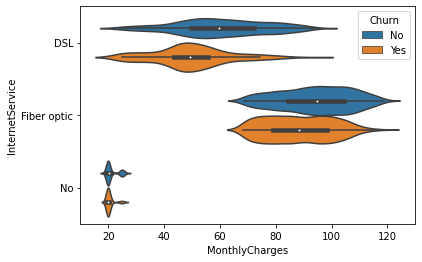

In [480]:
# Task 4c

violin = sns.violinplot(x =df['MonthlyCharges'],y = df['InternetService'],hue=df['Churn'])
plt.show(violin)

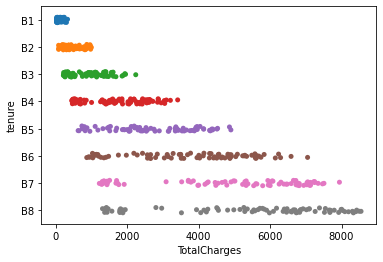

In [481]:
# Task 4d
dfS = df.sample(frac=0.1)
dfS['tenure'] = pd.qcut(dfS.tenure, q=8,labels=['B1','B2','B3','B4', 'B5','B6','B7','B8'])
stripplot = sns.stripplot(x=dfS['TotalCharges'],y=dfS['tenure'])
plt.show(stripplot)

In [482]:
# Task 4e
from math import sqrt
def monthyChargesSqrt(dfRow):
    return sqrt(dfRow['MonthlyCharges'])

df['MonthyChargesSqrt'] = df.apply(monthyChargesSqrt, axis=1)


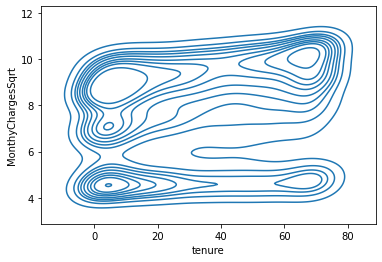

In [483]:
# Task 4f
kdeplot = sns.kdeplot(x = df['tenure'], y = df['MonthyChargesSqrt'])
plt.show(kdeplot)

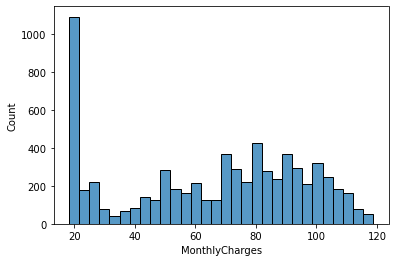

In [484]:
# Task 4g

histogram = sns.histplot(df['MonthlyCharges'], bins=30)
plt.show(histogram)

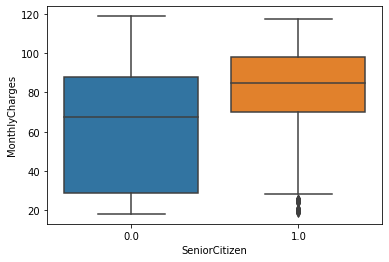

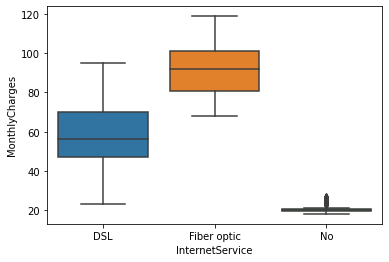

In [485]:
# Task 4h
ax = sns.boxplot(data = df, x = 'SeniorCitizen', y = 'MonthlyCharges') 
plt.show()
ax2 = sns.boxplot(data = df, x = 'InternetService', y = 'MonthlyCharges')
plt.show()

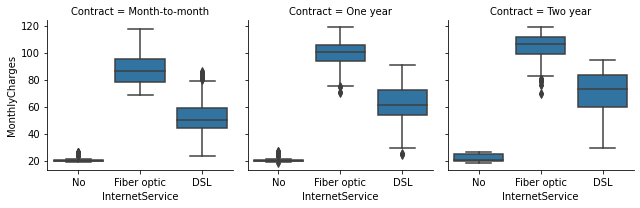

In [486]:
# Task 4i
sea = sns.FacetGrid(df, col = "Contract")
sea.map(sns.boxplot, "InternetService", "MonthlyCharges", order = ["No", "Fiber optic", 'DSL'])
plt.show(sea)

## PART 5: DATA TRANSFORMATION 

<Figure size 1296x360 with 0 Axes>

[Text(0, 0, 'zero'), Text(50, 0, 'middle'), Text(100, 0, 'max')]

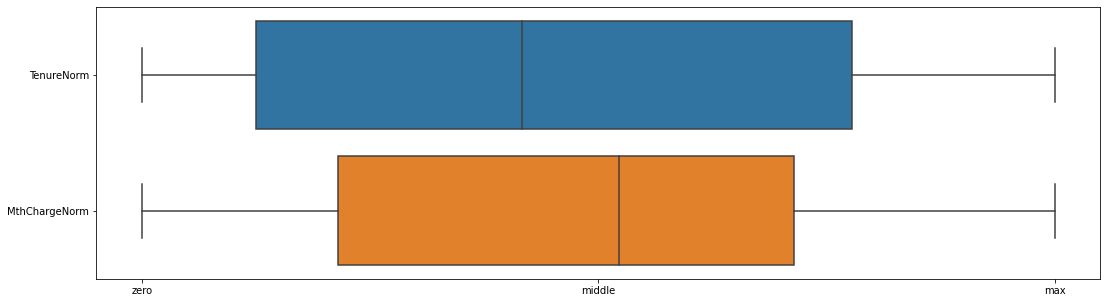

In [487]:
# Task 5a

fnc = lambda x: (x - min(x)) / (max(x) - min(x)) * 100

df[['TenureNorm', 'MthChargeNorm']] = round(df[['tenure', 'MonthlyCharges']].apply(fnc, axis=0),2)

plt.figure(figsize = (18, 5))
ax = sns.boxplot(data = df[['TenureNorm', 'MthChargeNorm']], orient="h")

ax.set_xticks([0,50,100])
ax.set_xticklabels(['zero', 'middle','max'])
plt.show(ax)


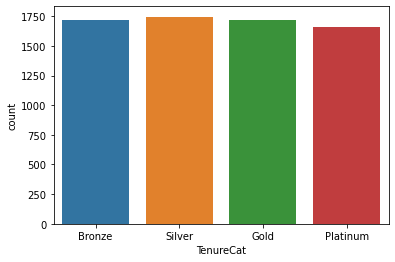

gender                 object
SeniorCitizen         float64
Partner                object
Dependents             object
tenure                float64
TenureCat            category
PhoneService           object
MultipleLines          object
InternetService        object
OnlineSecurity         object
OnlineBackup           object
DeviceProtection       object
TechSupport            object
StreamingTV            object
StreamingMovies        object
Contract               object
PaperlessBilling       object
PaymentMethod          object
MonthlyCharges        float64
TotalCharges          float64
Churn                  object
MonthyChargesSqrt     float64
TenureNorm            float64
MthChargeNorm         float64
dtype: object

gender                 object
SeniorCitizen         float64
Partner                object
Dependents             object
TenureCat            category
PhoneService           object
MultipleLines          object
InternetService        object
OnlineSecurity         object
OnlineBackup           object
DeviceProtection       object
TechSupport            object
StreamingTV            object
StreamingMovies        object
Contract               object
PaperlessBilling       object
PaymentMethod          object
MonthlyCharges        float64
TotalCharges          float64
Churn                  object
MonthyChargesSqrt     float64
TenureNorm            float64
MthChargeNorm         float64
dtype: object

In [488]:
# Task 5b

df['TenureCat'] = pd.qcut(df.tenure, q=4,labels=['Bronze','Silver','Gold','Platinum'])
ax = sns.countplot(data = df, x = "TenureCat")
plt.show()

idx = df.columns.get_loc('tenure')
first_column = df.pop('TenureCat')
df.insert(idx + 1, 'TenureCat', first_column)
df.dtypes
df.drop('tenure', inplace=True, axis=1)

df.dtypes

In [489]:
# Task 5c

s = df.groupby(by = df['TenureCat'])
s[['TenureCat']].count()

,TenureCat
TenureCat,
Bronze,1718
Silver,1746
Gold,1721
Platinum,1661


In [490]:
# Task 5d
s = df.groupby([df['InternetService'], df['TenureCat']])
s[['MonthlyCharges']].mean()

MonthlyCharges
InternetService TenureCat                
DSL             Bronze          48.338507
                Silver          54.700758
                Gold            60.294637
                Platinum        70.108938
Fiber optic     Bronze          81.377966
                Silver          88.217124
                Gold            94.588168
                Platinum       102.302086
No              Bronze          20.271186
                Silver          20.806589
                Gold            21.302241
                Platinum        22.259722

In [491]:
# Task 5e
s = df.groupby([df['TenureCat'], df['Contract']])
s[['MonthlyCharges']].mean().round(2)
df.to_csv('filename.csv',index=False)

MonthlyCharges
TenureCat Contract                      
Bronze    Month-to-month           58.70
          One year                 33.60
          Two year                 35.49
Silver    Month-to-month           68.92
          One year                 49.14
          Two year                 32.68
Gold      Month-to-month           78.89
          One year                 67.60
          Two year                 48.92
Platinum  Month-to-month           88.57
          One year                 82.98
          Two year                 70.19

## PART 8: FEATURE ENGINEERING

In [492]:
# Task 8a
def techsavvy(dfRow):
    if (dfRow['OnlineSecurity'] == 'Yes') and (dfRow['OnlineBackup'] == 'Yes') and (dfRow['InternetService'] == 'Fiber optic'):
        return 'high'
    elif (dfRow['OnlineSecurity'] == 'Yes') and (dfRow['OnlineBackup'] == 'No') and (dfRow['InternetService'] == 'Fiber optic'):
        return 'medium'
    elif dfRow['InternetService'] == 'No':
        return 'UK'
    else:
        return 'low'

df['Techsavvy'] = df.apply(techsavvy, axis=1)
df.head(10)
s = df.groupby(df['Techsavvy'])
s[['Techsavvy']].count()
df.shape
df = df[df.Techsavvy != 'UK']
df.shape
df.dtypes
data_types_dict = {'Techsavvy': 'category'}
df = df.astype(data_types_dict)

df.drop('OnlineSecurity', inplace=True, axis=1)
df.drop('OnlineBackup', inplace=True, axis=1)
df.dtypes


,gender,SeniorCitizen,Partner,Dependents,TenureCat,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthyChargesSqrt,TenureNorm,MthChargeNorm,Techsavvy
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0.0,Yes,No,Bronze,No,No phone service,DSL,No,Yes,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,5.463515,1.39,11.54,low
5575-GNVDE,Male,0.0,No,No,Gold,Yes,No,DSL,Yes,No,...,One year,No,Mailed check,56.95,1889.50,No,7.546522,47.22,38.51,low
7795-CFOCW,Male,0.0,No,No,Gold,No,No phone service,DSL,Yes,No,...,One year,No,Automatic,42.30,1840.75,No,6.503845,62.50,23.93,low
1452-KIOVK,Male,0.0,No,Yes,Silver,Yes,Yes,Fiber optic,No,Yes,...,Month-to-month,Yes,Automatic,89.10,1949.40,No,9.439280,30.56,70.50,low
6713-OKOMC,Female,0.0,No,No,Silver,No,No phone service,DSL,Yes,No,...,Month-to-month,No,Mailed check,29.75,301.90,No,5.454356,13.89,11.44,low
6388-TABGU,Male,0.0,No,Yes,Platinum,Yes,No,DSL,Yes,Yes,...,One year,No,Automatic,56.15,3487.95,No,7.493330,86.11,37.71,low
9763-GRSKD,Male,0.0,Yes,Yes,Silver,Yes,No,DSL,Yes,No,...,Month-to-month,Yes,Mailed check,49.95,587.45,No,7.067531,18.06,31.54,low
7469-LKBCI,Male,0.0,No,No,Silver,Yes,No,No,NaN,NaN,...,Two year,No,Automatic,18.95,326.80,No,4.353160,22.22,0.70,UK
8091-TTVAX,Male,0.0,Yes,No,Platinum,Yes,Yes,Fiber optic,No,No,...,One year,No,Automatic,100.35,5681.10,No,10.017485,80.56,81.69,low


,Techsavvy
Techsavvy,
UK,1422
high,487
low,4593
medium,344


(6846, 24)

(5424, 24)

gender                 object
SeniorCitizen         float64
Partner                object
Dependents             object
TenureCat            category
PhoneService           object
MultipleLines          object
InternetService        object
OnlineSecurity         object
OnlineBackup           object
DeviceProtection       object
TechSupport            object
StreamingTV            object
StreamingMovies        object
Contract               object
PaperlessBilling       object
PaymentMethod          object
MonthlyCharges        float64
TotalCharges          float64
Churn                  object
MonthyChargesSqrt     float64
TenureNorm            float64
MthChargeNorm         float64
Techsavvy              object
dtype: object

gender                 object
SeniorCitizen         float64
Partner                object
Dependents             object
TenureCat            category
PhoneService           object
MultipleLines          object
InternetService        object
DeviceProtection       object
TechSupport            object
StreamingTV            object
StreamingMovies        object
Contract               object
PaperlessBilling       object
PaymentMethod          object
MonthlyCharges        float64
TotalCharges          float64
Churn                  object
MonthyChargesSqrt     float64
TenureNorm            float64
MthChargeNorm         float64
Techsavvy            category
dtype: object

In [493]:
# Task 8b
def streamer(dfRow):
    if (dfRow['StreamingTV'] == 'Yes') and (dfRow['StreamingMovies'] == 'Yes'):
        return 'streamer'
    elif dfRow['InternetService'] == 'No':
        return 'UK'
    else:
        return 'non-streamer'

df['Streamer'] = df.apply(streamer, axis=1)

df.shape
df = df[df.Streamer != 'UK']
df.shape

df.head(10)

df.dtypes
data_types_dict = {'Streamer': 'category'}
df = df.astype(data_types_dict)
df.dtypes

df.drop('InternetService', inplace=True, axis=1)
df.drop('StreamingTV', inplace=True, axis=1)
df.drop('StreamingMovies', inplace=True, axis=1)
df.dtypes

s = df.groupby(df['Streamer'])
s[['Streamer']].count()


(5424, 23)

(5424, 23)

,gender,SeniorCitizen,Partner,Dependents,TenureCat,PhoneService,MultipleLines,InternetService,DeviceProtection,TechSupport,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthyChargesSqrt,TenureNorm,MthChargeNorm,Techsavvy,Streamer
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0.0,Yes,No,Bronze,No,No phone service,DSL,No,No,...,Yes,Electronic check,29.85,29.85,No,5.463515,1.39,11.54,low,non-streamer
5575-GNVDE,Male,0.0,No,No,Gold,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,No,7.546522,47.22,38.51,low,non-streamer
7795-CFOCW,Male,0.0,No,No,Gold,No,No phone service,DSL,Yes,Yes,...,No,Automatic,42.30,1840.75,No,6.503845,62.50,23.93,low,non-streamer
1452-KIOVK,Male,0.0,No,Yes,Silver,Yes,Yes,Fiber optic,No,No,...,Yes,Automatic,89.10,1949.40,No,9.439280,30.56,70.50,low,non-streamer
6713-OKOMC,Female,0.0,No,No,Silver,No,No phone service,DSL,No,No,...,No,Mailed check,29.75,301.90,No,5.454356,13.89,11.44,low,non-streamer
6388-TABGU,Male,0.0,No,Yes,Platinum,Yes,No,DSL,No,No,...,No,Automatic,56.15,3487.95,No,7.493330,86.11,37.71,low,non-streamer
9763-GRSKD,Male,0.0,Yes,Yes,Silver,Yes,No,DSL,No,No,...,Yes,Mailed check,49.95,587.45,No,7.067531,18.06,31.54,low,non-streamer
8091-TTVAX,Male,0.0,Yes,No,Platinum,Yes,Yes,Fiber optic,Yes,No,...,No,Automatic,100.35,5681.10,No,10.017485,80.56,81.69,low,streamer
5129-JLPIS,Male,0.0,No,No,Silver,Yes,No,Fiber optic,Yes,Yes,...,Yes,Electronic check,105.50,2686.05,No,10.271319,34.72,86.82,medium,streamer


gender                 object
SeniorCitizen         float64
Partner                object
Dependents             object
TenureCat            category
PhoneService           object
MultipleLines          object
InternetService        object
DeviceProtection       object
TechSupport            object
StreamingTV            object
StreamingMovies        object
Contract               object
PaperlessBilling       object
PaymentMethod          object
MonthlyCharges        float64
TotalCharges          float64
Churn                  object
MonthyChargesSqrt     float64
TenureNorm            float64
MthChargeNorm         float64
Techsavvy            category
Streamer               object
dtype: object

gender                 object
SeniorCitizen         float64
Partner                object
Dependents             object
TenureCat            category
PhoneService           object
MultipleLines          object
InternetService        object
DeviceProtection       object
TechSupport            object
StreamingTV            object
StreamingMovies        object
Contract               object
PaperlessBilling       object
PaymentMethod          object
MonthlyCharges        float64
TotalCharges          float64
Churn                  object
MonthyChargesSqrt     float64
TenureNorm            float64
MthChargeNorm         float64
Techsavvy            category
Streamer             category
dtype: object

gender                 object
SeniorCitizen         float64
Partner                object
Dependents             object
TenureCat            category
PhoneService           object
MultipleLines          object
DeviceProtection       object
TechSupport            object
Contract               object
PaperlessBilling       object
PaymentMethod          object
MonthlyCharges        float64
TotalCharges          float64
Churn                  object
MonthyChargesSqrt     float64
TenureNorm            float64
MthChargeNorm         float64
Techsavvy            category
Streamer             category
dtype: object

,Streamer
Streamer,
non-streamer,3506
streamer,1918


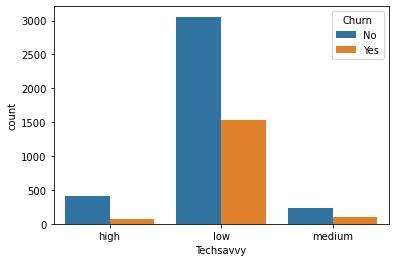

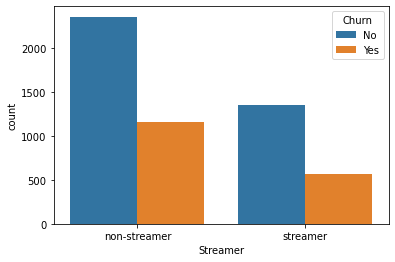

In [494]:
# Task 8c
ax = sns.countplot(data = df, x = 'Techsavvy', hue = 'Churn')
plt.show()

ax2 = sns.countplot(data = df, x = 'Streamer', hue = 'Churn')
plt.show()


In [495]:
# Task 8d
def dummychurn(dfRow):
    if dfRow['Churn'] == 'Yes':
        return 1
    else:
        return 0

df['Churn'] = df.apply(dummychurn, axis=1)


dummies = pd.get_dummies(df[['Streamer', 'Techsavvy', 'TenureCat', 'PaymentMethod']])

df2 = pd.concat([dummies, df['Churn'], df['MonthlyCharges']], axis=1)

## PART 9: FEATURE SELECT & FEATURE IMPORTANCE

## PART 10: MODELING

In [496]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df2[['Streamer_non-streamer','Streamer_streamer', 'Techsavvy_high', 'Techsavvy_low', 'Techsavvy_medium',
        'TenureCat_Bronze', 'TenureCat_Silver','TenureCat_Gold','TenureCat_Platinum', 'PaymentMethod_Automatic',
        'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'MonthlyCharges']]
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,random_state=42) 

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print('Logistic Regression Train accuracy %s' % logreg.score(X_train, y_train)) #Train accuracy
print('Logistic Regression Test accuracy %s' % accuracy_score(y_pred_logreg, y_test)) #Test accuracy
print(confusion_matrix(y_test, y_pred_logreg)) #Confusion matrix
print(classification_report(y_test, y_pred_logreg)) #Classification Report

LogisticRegression(max_iter=1000)

Logistic Regression Train accuracy 0.7516902274124155
Logistic Regression Test accuracy 0.7456221198156682
[[1287  201]
 [ 351  331]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1488
           1       0.62      0.49      0.55       682

    accuracy                           0.75      2170
   macro avg       0.70      0.68      0.68      2170
weighted avg       0.73      0.75      0.74      2170

